In [1]:
##read this in conjuction w/ the read_me_steps.txt file which outlines a few of the steps our group intends to take

import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)

In [2]:
##STEP 1 READ DATA IN & CHANGE COLUMN NAMES TO REAL NAMES
data_dict = {
    'P(IPO)':'offer_price',
    'P(H)': 'price_range_higher_bound',
    'P(L)': 'price_range_lower_bound',
    'P(1Day)':'first_day_trading_price',
    'C1':'days',
    'C2':'top_tier_dummy',
    'C3':'earnings_per_share',
    'C4':'prior_nasdaq_15day_returns',
    'C5':'outstanding_shares',
    'C6':'offering_shares',
    'C7':'sales',
    'T1':'number_of_sentences',
    'T2':'number_of_words',
    'T3':'number_of_real_words',
    'T4':'number_of_long_sentences',
    'T5':'number_of_long_words',
    'S1':'number_of_positive_words',
    'S2':'number_of_negative_words',
    'S3':'number_of_uncertain_words',
    'Y1':'pre_ipo_price_revision',
    'Y2':'post_ipo_initial_return',
    'C3':'positive_eps_dummy',
    'C5':'share_overhang',
    'C6':'up_revision',
    'I1':'ticker',
    'I2':'company_name',
    'I3':'industry_classifier'
    
}

df = pd.read_excel('Competition1_raw_data.xlsx')
df.rename(columns=data_dict,inplace=True)

#sketchy column values and not super valuable w/ 200+ categories anyway
df = df.drop('industry_classifier',1)
df.head()

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10,9.5,8.5,11.87,122,1,3.43,0.0290743,40962052,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8,10,8,7.25,259,0,-1.62,-0.0133516,28869196,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,7,14,12,6.7,90,1,-1.24,0.020715,16845668,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16,14,12.39,209,1,-0.91,0.0200231,14848637,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21,21,19,56.6,80,1,0.07,-0.0348947,30741716,8250000,632.298,572,14830,13176,336,720,67,149,167


In [3]:
#JUST MAKING SURE THE FILTERING LOGIC TO DETERMINE NUMBER OF '-'s WORKS THE WAY I THINK IT WORKS
print(df.replace('-',np.nan).isna().sum().sales == len(df[df['sales']=='-']))
median = df.copy()
mean = df.copy()
#PRINT NUMBER OF MISSING VALUES IN EACH COLUMN
df.replace('-',np.nan).isna().sum()

True


ticker                         0
company_name                   0
offer_price                    5
price_range_higher_bound      10
price_range_lower_bound       10
first_day_trading_price       22
days                          22
top_tier_dummy                22
positive_eps_dummy            36
prior_nasdaq_15day_returns    22
share_overhang                 6
up_revision                    6
sales                         72
number_of_sentences            1
number_of_words                1
number_of_real_words           1
number_of_long_sentences       1
number_of_long_words           1
number_of_positive_words       1
number_of_negative_words       1
number_of_uncertain_words      1
dtype: int64

In [4]:
#STEP 2, IMPUTE MISSING DATA CREATE DATAFRAME W. MEAN REPLACEMENT
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

mean_value_dict = {}

for i in needs_replacement:
    new_df = mean[mean['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].mean()
    mean_value_dict.update({i:med})

for i in needs_replacement:
    mean['{}'.format(i)] = mean['{}'.format(i)].replace('-',mean_value_dict['{}'.format(i)])

mean.replace('-',np.nan).isna().sum()
mean_value_dict

{'days': 149.72878787878787,
 'first_day_trading_price': 25.93476614935861,
 'number_of_long_sentences': 294.3538913362702,
 'number_of_long_words': 679.2202643171806,
 'number_of_negative_words': 120.1042584434655,
 'number_of_positive_words': 68.42143906020559,
 'number_of_real_words': 11395.844346549193,
 'number_of_sentences': 465.63436123348015,
 'number_of_uncertain_words': 144.75917767988253,
 'number_of_words': 12758.606461086638,
 'offer_price': 13.837666174298375,
 'positive_eps_dummy': 1.7889040247678045,
 'price_range_higher_bound': 15.481190476190477,
 'price_range_lower_bound': 13.515044642857143,
 'prior_nasdaq_15day_returns': 0.007282201411438542,
 'sales': 500.45996229508165,
 'share_overhang': 49357759.34467456,
 'top_tier_dummy': 0.8590909090909091,
 'up_revision': 12415194.229289941}

In [9]:
#does price_range_higher_bound have to be higher than offer price and lower have to be lower than offer price? 
#if so this could filter out some bad records that need to be filtered out

mean[mean['price_range_lower_bound']>mean['price_range_higher_bound']]
mean[mean['price_range_higher_bound']<mean['offer_price']]
mean[mean['price_range_lower_bound']>mean['offer_price']]

#first day trading price of 0?
#number of words 0?
#number_of_real_words 0?
#number_of_long_sentences 0?
#number of long words -1?
#number of positive words -1?

#mean.sort_values('number_of_uncertain_words')

,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words
2,ACAD,ACADIA PHARMACEUTICALS INC,7.00,14.00000,12.000000,6.700000,90.000000,1.000000,-1.240000,0.020715,1.684567e+07,5.000000e+06,7.378000,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.50,16.00000,14.000000,12.390000,209.000000,1.000000,-0.910000,0.020023,1.484864e+07,4.500000e+06,8.526000,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
6,ACOR,ACORDA THERAPEUTICS INC,6.00,13.00000,11.000000,6.720000,128.000000,1.000000,-1.870000,0.004106,1.904702e+07,5.500000e+06,5.146000,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,5.00,14.00000,12.000000,4.550000,91.000000,0.000000,-0.740000,0.040620,1.937175e+07,8.000000e+06,500.459962,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,15.00,18.00000,16.000000,15.900000,100.000000,1.000000,-0.510000,-0.029316,5.298250e+07,1.100000e+07,279.600000,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,9.00,19.00000,17.000000,0.000000,106.000000,1.000000,1.490000,-0.024925,3.362269e+07,1.100000e+07,494.008000,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0
11,ADLS,"Advanced Life Sciences Holdings, Inc.",5.00,9.00000,8.000000,6.000000,99.000000,1.000000,-398.100000,0.015487,1.782680e+07,7.000000e+06,0.320000,253.0,5788.0,5200.0,138.0,385.0,29.0,41.0,70.0
14,AGAM,"AGA Medical Holdings, Inc.",14.50,16.00000,15.000000,14.600000,488.000000,1.000000,0.180000,0.023275,5.002552e+07,1.375000e+07,166.896000,624.0,18633.0,16471.0,380.0,909.0,98.0,256.0,172.0
15,AH,R1 RCM INC.,12.00,16.00000,14.000000,13.550000,233.000000,1.000000,0.170000,-0.085455,9.001571e+07,1.000000e+07,510.192000,586.0,18142.0,15782.0,413.0,649.0,98.0,92.0,155.0
17,AIMC,Altra Industrial Motion Corp.,13.50,16.00000,14.000000,14.290000,77.000000,1.000000,0.140000,-0.006316,2.308759e+07,1.000000e+07,363.465000,391.0,11322.0,9589.0,247.0,603.0,72.0,134.0,133.0


In [12]:
#STEP 2, IMPUTE MISSING DATA. CREATE DATAFRAME WITH MEDIAN REPLACEMENT
placeholder = df.replace('-',np.nan).isna().sum().reset_index().rename(columns={'index':'columns1',0:'nulls'})
needs_replacement = placeholder[placeholder['nulls']>0].columns1.unique()

median_value_dict = {}

for i in needs_replacement:
    new_df = median[median['{}'.format(i)]!='-']
    med = new_df['{}'.format(i)].median()
    median_value_dict.update({i:med})
    
median_value_dict

for i in needs_replacement:
    median['{}'.format(i)] = median['{}'.format(i)].replace('-',median_value_dict['{}'.format(i)])

median.replace('-',np.nan).isna().sum()
median_value_dict

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\pandas\core\ops.py:1167: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [13]:
##define and apply functions to calculate target variables per the data dictionary

#definition to calculate pre ipo price revision column
def calculate_Y1(mid,high,low):
    cut_off_point = (high + low) / 2
    if mid < cut_off_point:
        return 1
    else:
        return 0 
    
#definition to calculate post ipo initial return    
def calculate_Y2(offer_price, close_price):
    if offer_price < close_price:
        return 1
    else:
        return 0
    
mean['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(mean['offer_price'],mean['price_range_higher_bound'],mean['price_range_lower_bound'])]    
median['pre_IPO_price_revision'] = [calculate_Y1(mid,high,low) for mid,high,low in zip(median['offer_price'],median['price_range_higher_bound'],median['price_range_lower_bound'])]

mean['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(mean['offer_price'],mean['first_day_trading_price'])]    
median['post_IPO_initial_return'] = [calculate_Y2(offer_price,close_price) for offer_price, close_price in zip(median['offer_price'],median['first_day_trading_price'])]

#write out files for performance testing
median.to_csv('median.csv')
mean.to_csv('mean.csv')

In [14]:
#define functions to calculate & replace outliers
def calculate_outliers(value,q1,q3,iqr):
    if value > q3 + 1.5*iqr:
        global upper_count
        upper_count = upper_count + 1
        return q3
    elif value < q1 - 1.5*iqr:
        global lower_count
        lower_count = lower_count + 1
        return q1
    else:
        return value
    

In [15]:
#GET A LIST OF CONTINOUS COLUMNS THAT WILL EVENTUALLY COME IN HANDY FOR NORMALIZATION, OUTLIER CALCS, ETC.
z_score_columns = mean.drop(['ticker','company_name','top_tier_dummy','pre_IPO_price_revision','post_IPO_initial_return'],1).columns


In [16]:
#apply functions to calculate & replace outliers in the data , keeping track of the number of replacements in each column
#use list comprehensions for range of i's.
for col in z_score_columns:
    upper_count = 0
    lower_count = 0
    q1 = median[col].quantile(.25)
    q3 = median[col].quantile(.75)
    iqr = q3-q1
    median[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(median[col], [q1 for i in range(0,len(median))], [q3 for i in range(0,len(median))], [iqr for i in range(0,len(median))])]    
    print('median ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('median ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')
    
for col in z_score_columns:
    upper_count = 0 
    lower_count = 0
    q1 = mean[col].quantile(.25)
    q3 = mean[col].quantile(.75)
    iqr = q3-q1
    mean[col] = [calculate_outliers(value,q1,q3,iqr) for value, q1, q3, iqr in zip(mean[col],[q1 for i in range(0,len(mean))],[q3 for i in range(0,len(mean))],[iqr for i in range(0,len(mean))])]
    print('mean ' + col + ' ' + str(upper_count) + ' upper outliers replaced')
    print('mean ' + col + ' ' + str(lower_count) + ' lower outliers replaced')
    print(' ')

median offer_price 14 upper outliers replaced
median offer_price 0 lower outliers replaced
 
median price_range_higher_bound 28 upper outliers replaced
median price_range_higher_bound 15 lower outliers replaced
 
median price_range_lower_bound 27 upper outliers replaced
median price_range_lower_bound 6 lower outliers replaced
 
median first_day_trading_price 59 upper outliers replaced
median first_day_trading_price 0 lower outliers replaced
 
median days 69 upper outliers replaced
median days 0 lower outliers replaced
 
median positive_eps_dummy 41 upper outliers replaced
median positive_eps_dummy 84 lower outliers replaced
 
median prior_nasdaq_15day_returns 0 upper outliers replaced
median prior_nasdaq_15day_returns 9 lower outliers replaced
 
median share_overhang 53 upper outliers replaced
median share_overhang 0 lower outliers replaced
 
median up_revision 72 upper outliers replaced
median up_revision 0 lower outliers replaced
 
median sales 89 upper outliers replaced
median sales

In [17]:
#WRITE OUT AND PERFORMANCE TEST 
median.to_csv('median_no_outliers.csv')
mean.to_csv('mean_no_outliers.csv')

In [18]:
#SHOW SKEWNESS OF ALL COLUMNS
from scipy.stats import skew

for col in z_score_columns:
    print(col + ' ' + str(skew(median[col])))
    
#skew(median.offer_price)
#median.hist()
#plt.show()

offer_price 0.06039858262790416
price_range_higher_bound -0.08925514480913105
price_range_lower_bound -0.07552738399604172
first_day_trading_price 0.19858482771795977
days 0.4836970895714529
positive_eps_dummy -0.2691040246777231
prior_nasdaq_15day_returns -0.13981468661917879
share_overhang 1.0008123629815167
up_revision 0.8162649558131012
sales 1.212434053221013
number_of_sentences 0.2952575883472776
number_of_words 0.3331722336388886
number_of_real_words 0.31508455331783725
number_of_long_sentences 0.3673822472122944
number_of_long_words 0.4203704208847791
number_of_positive_words 0.467278778122756
number_of_negative_words 0.5199203289945921
number_of_uncertain_words 0.35011147636825024


In [27]:
#OUTLIERS.
#use IQR to handle outliers if you haven't normalized
#1.5 * lower IQR or Higher IQR to get outliers

#then we need to skewness handling to get every column normalized.

#then impute the data. figure out which columns to use mean and median based on the histogram or the skewness function
#then scale the columns

#one hot encode any categorical variables
#also add the industry category and encode. or bin continous variables. do binning after feature_selection. only bin useful shit 
#not all missing data is nan, '-',


#OUTLIERS
#NORMALIZE FIRST
#CALCULATE Z-SCORE
#REPLACE OUTLIERS
#IMPUTE DATA figure out which columns to use mean and median based on the histogram. use skew function to detect skewness
#SCALE COLUMNS
#ONE HOT ENCODE

#use z-score if and only if you handled skewness (normalization)
#for categorical values impute w/ mode. for the rest impute w/ mean 


#undersampling / oversampling in  order to balance 0's and 1's. If it's not crazy unbalanced do undersampling (cut off extra data to even it out)
#1.5 as many 1's as 0's. If it's further unbalanced 3x 4x do over sampling. 

In [19]:
#Check Skewness and normalize variables in Mean DataFrame
#functions used to normalize were a judgement call that was determined by inspection
import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(mean.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(mean.iloc[:,col])<(-.5) and scipy.stats.skew(mean.iloc[:,col]) >=(-1):
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>.5 and scipy.stats.skew(mean.iloc[:,col]) <1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])<-1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(mean.iloc[:,col])>1:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(mean['share_overhang'])))
mean['share_overhang'] = np.cbrt(mean['share_overhang'])

#Apply Square root to up_revision to normalize
print(scipy.stats.skew(np.sqrt(mean['up_revision'])))
mean['up_revision'] = np.sqrt(mean['up_revision'])

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(mean['sales'])))
mean['sales'] = np.cbrt(mean['sales'])

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(mean['number_of_negative_words'])))
mean['number_of_negative_words'] = np.sqrt(mean['number_of_negative_words'])


top_tier_dummy -2.098290225275937  - Highly Negatively Skewed
share_overhang 0.9697129693431528  - Moderately Positively Skewed
up_revision 0.7971451051563555  - Moderately Positively Skewed
sales 1.0813539634476048  - Highly Positively Skewed
number_of_negative_words 0.5179597306591368  - Moderately Positively Skewed
 
0.18208840658889006
0.13389114380195302
-0.04286409180931812
0.029055337844225645


In [30]:
#Check Skewness and normalize variables in Median DataFrame
#functions used to normalize were a judgement call that was determined by inspection

import scipy.stats

for col in range(2,21):
    if abs(scipy.stats.skew(median.iloc[:,col]))<=.5:
        #print(mean.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(median.iloc[:,col])<(-.5) and scipy.stats.skew(median.iloc[:,col]) >=(-1):
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>.5 and scipy.stats.skew(median.iloc[:,col]) <1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])<-1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(median.iloc[:,col])>1:
        print(median.columns[col],scipy.stats.skew(median.iloc[:,col]),' - Highly Positively Skewed')

##No need to normalize dummy variable
print(' ')
#Apply cube root to share_overhang to normalize
print(scipy.stats.skew(np.cbrt(median['share_overhang'])))

#Apply cube root to up_revision to normalize
print(scipy.stats.skew(np.cbrt(median['up_revision'])))

#Apply cube root to sales to normalize
print(scipy.stats.skew(np.cbrt(median['sales'])))

#Apply Square root to number_of_negative_words to normalize
print(scipy.stats.skew(np.sqrt(median['number_of_negative_words'])))


mean.head()

top_tier_dummy -2.1192517713040706  - Highly Negatively Skewed
share_overhang 1.0008123629815167  - Highly Positively Skewed
up_revision 0.8162649558131012  - Moderately Positively Skewed
sales 1.212434053221013  - Highly Positively Skewed
number_of_negative_words 0.5199203289945921  - Moderately Positively Skewed
 
0.20518707217294313
-0.1311859863266954
-0.17131036229408955
0.03086460117977873


,ticker,company_name,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,10.0,9.5,8.5,11.870000,122.00,1.0,0.60,0.029074,7.011649,57.059304,1.549014,470.0,12719.0,11560.0,301.0,690.0,62.0,3.288868,139.0,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,8.0,10.0,8.0,7.250000,152.75,0.0,-1.62,-0.013352,6.744305,39.359793,1.435821,791.0,21792.0,19585.0,510.0,1120.0,71.0,3.944154,237.0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,7.0,14.0,12.0,6.700000,90.00,1.0,-1.24,0.020715,6.352478,47.287080,1.248641,201.0,5262.0,4785.0,128.0,325.0,61.0,2.396782,60.0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,11.5,16.0,14.0,12.390000,209.00,1.0,-0.91,0.020023,6.264033,46.057794,1.268867,328.0,8259.0,7574.0,177.0,509.0,80.0,2.771488,110.0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,21.0,21.0,19.0,21.030001,80.00,1.0,0.07,-0.034895,6.791564,53.593669,2.047451,572.0,14830.0,13176.0,336.0,720.0,67.0,3.493788,167.0,0,1


In [31]:
#WRITE OUT FOR PERFORMANCE TESTING
median.to_csv('median_no_outliers_no_skewness.csv')
mean.to_csv('mean_no_outliers_no_skewness.csv')

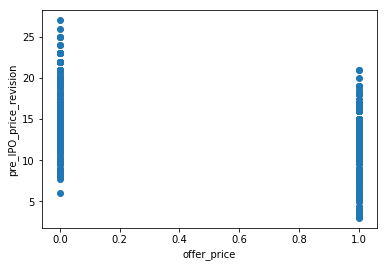

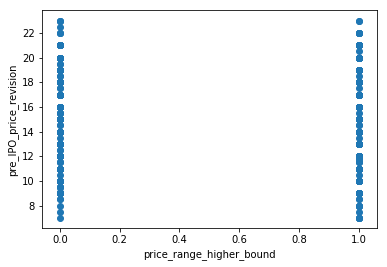

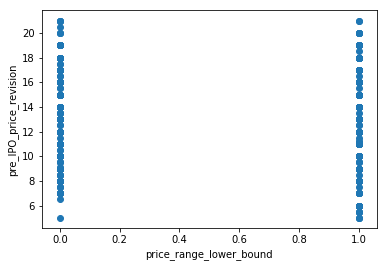

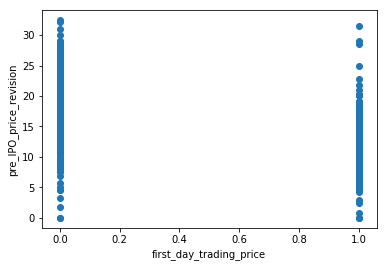

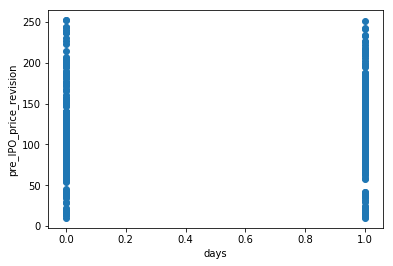

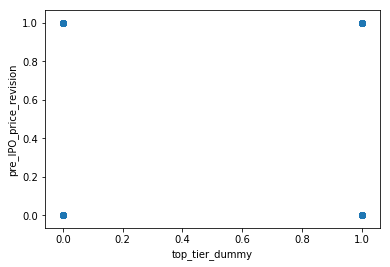

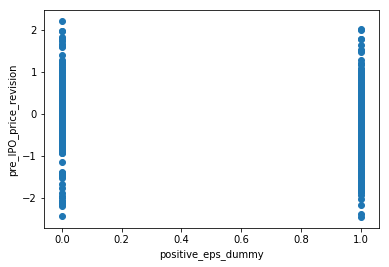

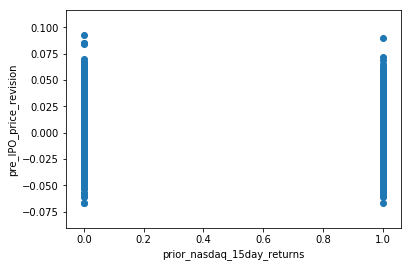

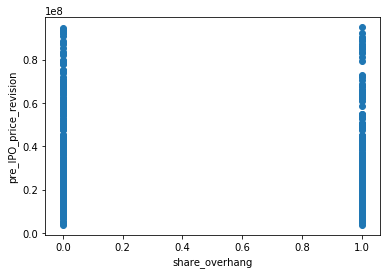

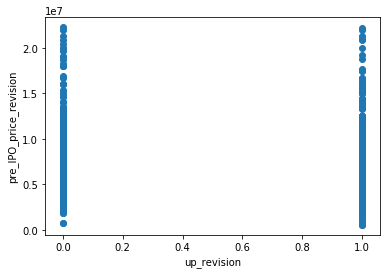

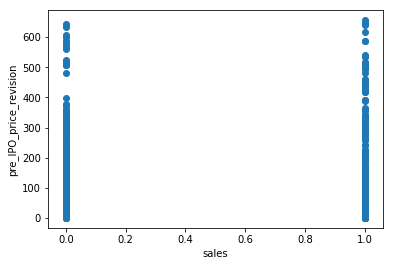

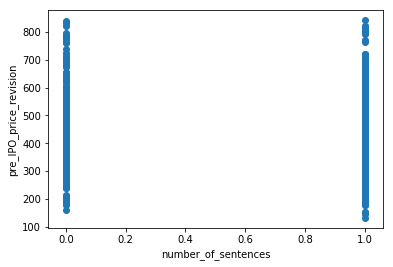

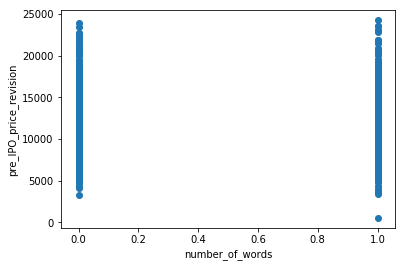

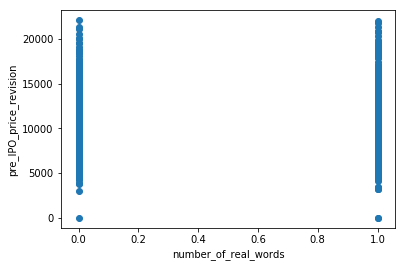

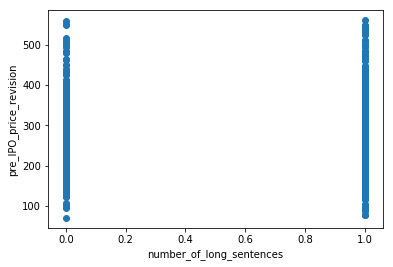

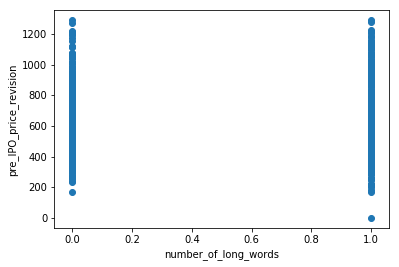

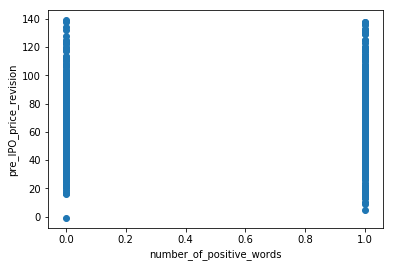

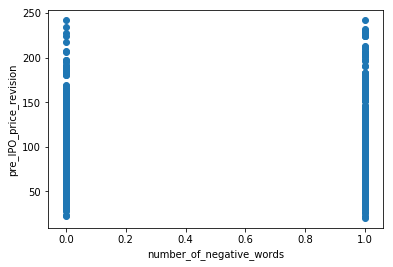

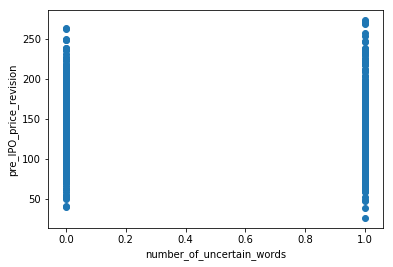

In [32]:
#STEP 3 EDA - CHECK OUT SCATTER PLOT RELATIONSHIP BETWEEN OFFER_PRICE AND 
import matplotlib.pyplot as plt

continous_columns = df.drop(['ticker','company_name'],1).columns

for i in continous_columns:
    plt.scatter(median['pre_IPO_price_revision'],median['{}'.format(i)])
    plt.xlabel('{}'.format(i))
    plt.ylabel('pre_IPO_price_revision')
    plt.show()
    

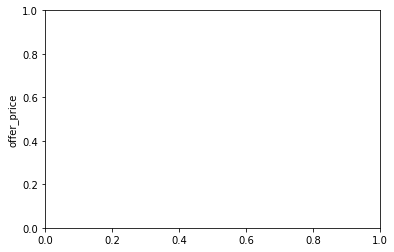

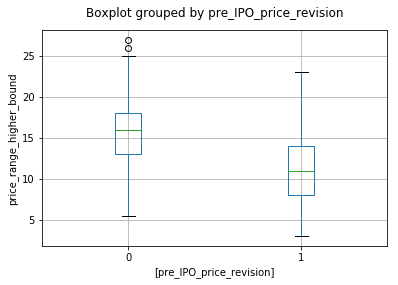

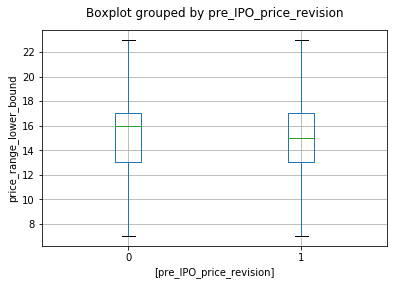

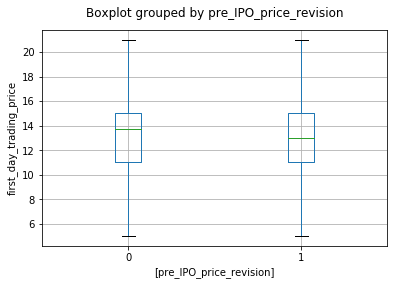

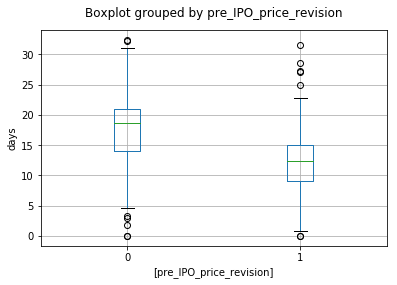

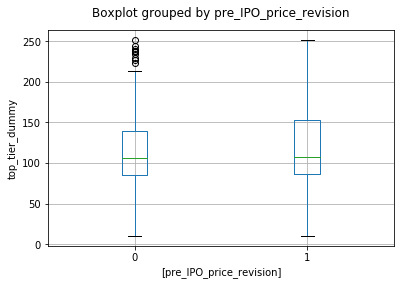

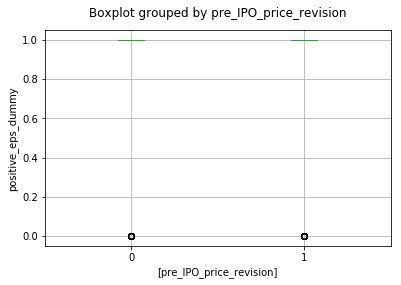

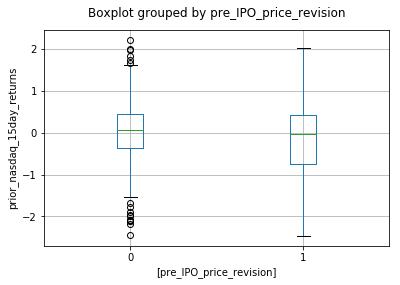

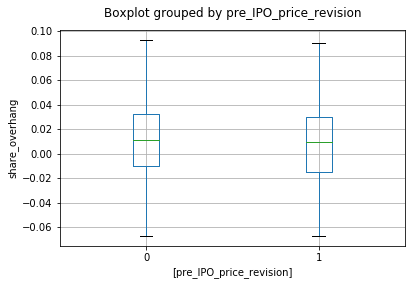

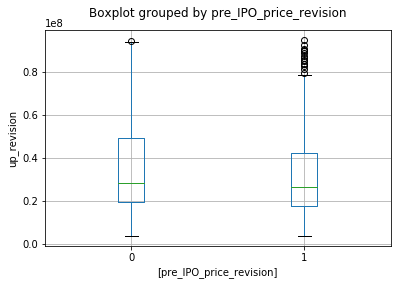

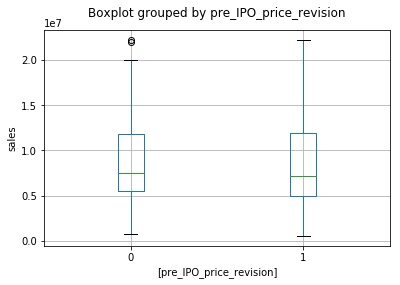

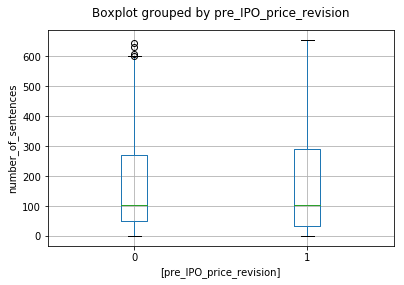

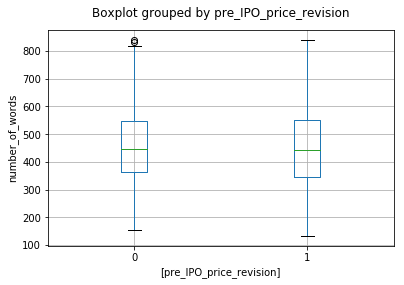

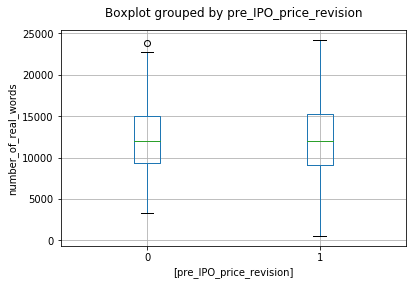

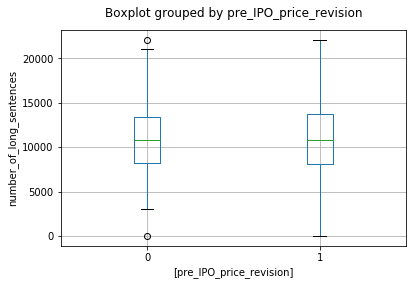

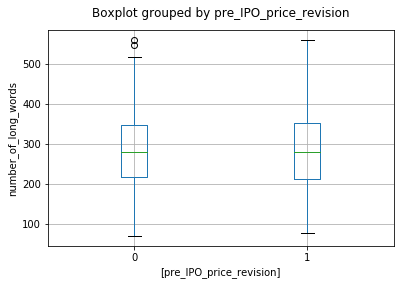

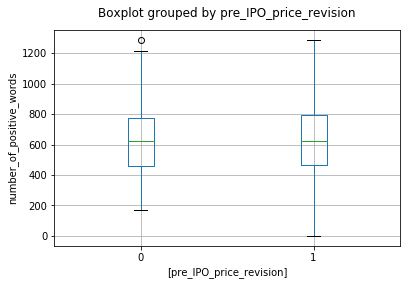

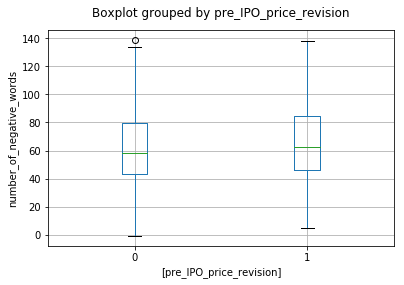

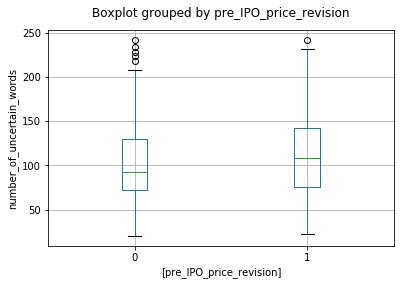

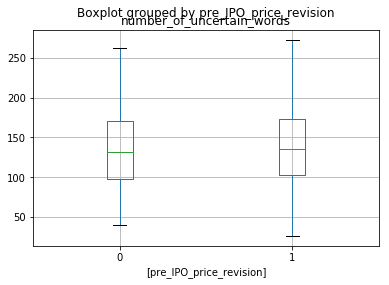

In [18]:
for i in continous_columns:
    plt.title('')
    plt.ylabel(i)
    median[['{}'.format(i),'pre_IPO_price_revision']].boxplot(by='pre_IPO_price_revision')

In [20]:
#REPLACE EACH COLUMN IN THE MEAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE.
for col in z_score_columns:
    mean[col] = (mean[col]-mean[col].mean())/mean[col].std(ddof=0)

#REPLACE EACH COLUMN IN THE MEDIAN PIPELINE W/ THE CORRESPONDING Z SCORE FOR THAT VALUE
for col in z_score_columns:
    median[col] = (median[col]-median[col].mean())/median[col].std(ddof=0)
    

In [21]:
#WRITE OUT FOR PERFORMANCE TESTING
median.to_csv('median_no_outliers_no_skewness_z_score.csv')
mean.to_csv('mean_no_outliers_no_skewness_z_score.csv')

In [23]:
#STEP 3 EDA - CORRELATIONS. 
mean.corr()

,offer_price,price_range_higher_bound,price_range_lower_bound,first_day_trading_price,days,top_tier_dummy,positive_eps_dummy,prior_nasdaq_15day_returns,share_overhang,up_revision,sales,number_of_sentences,number_of_words,number_of_real_words,number_of_long_sentences,number_of_long_words,number_of_positive_words,number_of_negative_words,number_of_uncertain_words,pre_IPO_price_revision,post_IPO_initial_return
offer_price,1.000000,0.741710,0.763424,0.553282,-0.067780,0.276023,0.125448,0.017344,0.333657,0.366476,0.291807,0.268505,0.227557,0.213377,0.234108,0.200231,0.145178,0.188123,0.169851,-0.500505,0.025233
price_range_higher_bound,0.741710,1.000000,0.975528,0.399512,-0.039073,0.277826,0.117561,-0.011637,0.299838,0.387430,0.402663,0.254677,0.233431,0.214453,0.235972,0.210500,0.206931,0.250832,0.194895,-0.068765,-0.086890
price_range_lower_bound,0.763424,0.975528,1.000000,0.388193,-0.058006,0.317432,0.127586,-0.021695,0.325328,0.410164,0.390496,0.267524,0.246182,0.227490,0.249055,0.223466,0.223471,0.261261,0.199389,-0.068737,-0.083729
first_day_trading_price,0.553282,0.399512,0.388193,1.000000,0.040130,0.206381,0.146071,0.029093,0.179614,0.141382,0.117726,0.049524,0.055899,0.047863,0.052508,0.030313,0.028992,0.014231,0.045508,-0.391873,0.442581
days,-0.067780,-0.039073,-0.058006,0.040130,1.000000,-0.007799,0.028033,0.103123,0.031622,-0.006085,0.068355,0.106162,0.089408,0.094741,0.079745,0.104515,0.075108,0.081166,0.072787,0.077222,0.008592
top_tier_dummy,0.276023,0.277826,0.317432,0.206381,-0.007799,1.000000,0.009358,-0.040663,0.438379,0.407181,0.166309,0.198760,0.196873,0.191322,0.197639,0.229104,0.179388,0.155109,0.202092,-0.072853,0.065582
positive_eps_dummy,0.125448,0.117561,0.127586,0.146071,0.028033,0.009358,1.000000,0.003706,0.136913,0.176127,0.291801,0.124194,0.099482,0.104755,0.132872,0.032094,0.087253,0.080482,0.017008,-0.069926,0.045305
prior_nasdaq_15day_returns,0.017344,-0.011637,-0.021695,0.029093,0.103123,-0.040663,0.003706,1.000000,-0.047047,-0.018514,0.017299,0.022159,0.020166,0.033981,0.032427,0.041927,0.040075,0.015943,0.052161,-0.073205,0.111764
share_overhang,0.333657,0.299838,0.325328,0.179614,0.031622,0.438379,0.136913,-0.047047,1.000000,0.694246,0.324706,0.431797,0.436809,0.427551,0.447784,0.453067,0.372242,0.388760,0.367018,-0.072771,0.009244
up_revision,0.366476,0.387430,0.410164,0.141382,-0.006085,0.407181,0.176127,-0.018514,0.694246,1.000000,0.403727,0.362214,0.357123,0.346405,0.368127,0.337385,0.315447,0.362832,0.290091,-0.008686,-0.061047


In [36]:
#scale all the columns (0-1)
for col in z_score_columns:
    mean[col] = pd.Series(min_max_scaler.fit_transform(np.array(mean[col]).reshape(-1,1)).reshape(1,len(mean[col]))[0])
    median[col] = pd.Series(min_max_scaler.fit_transform(np.array(mean[col]).reshape(-1,1)).reshape(1,len(mean[col]))[0])

In [37]:
#write out for performance testing
median.to_csv('median_no_outliers_no_skewness_z_score_scaled.csv')
mean.to_csv('mean_no_outliers_no_skewness_z_score_scaled.csv')

In [24]:
#one hot encode an industry variable that we added
ticker_sector_mapping=pd.read_csv('ticker_sector_mapping.csv')

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

mean_with_sector=mean.merge(ticker_sector_mapping,how='left',left_on='ticker',right_on='Ticker')
median_with_sector=median.merge(ticker_sector_mapping,how='left',left_on='ticker',right_on='Ticker')


dummies_mean=pd.get_dummies(mean_with_sector['Sector Bin'].astype(str))
dummies_median=pd.get_dummies(median_with_sector['Sector Bin'].astype(str))


mean_merged=pd.concat([mean,dummies_mean],axis='columns')
median_merged=pd.concat([median,dummies_median],axis='columns')

median.to_csv('median_no_outliers_no_skewness_z_score_scaled_one_hot.csv')
mean.to_csv('mean_no_outliers_no_skewness_z_score_scaled_one_hot.csv')